In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [3]:
#hide
Path.BASE_PATH = path

In [4]:
fname = (path/"images").ls()[0]
fname

Path('images/miniature_pinscher_199.jpg')

In [5]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=setup_aug_tfms([
                     Rotate(draw=30, p=1, size=224), 
                     Zoom(draw=1.2, p=1., size=224),
                     Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
                 )

dls = pets.dataloaders(path/"images")
#pets.summary(path/"images")

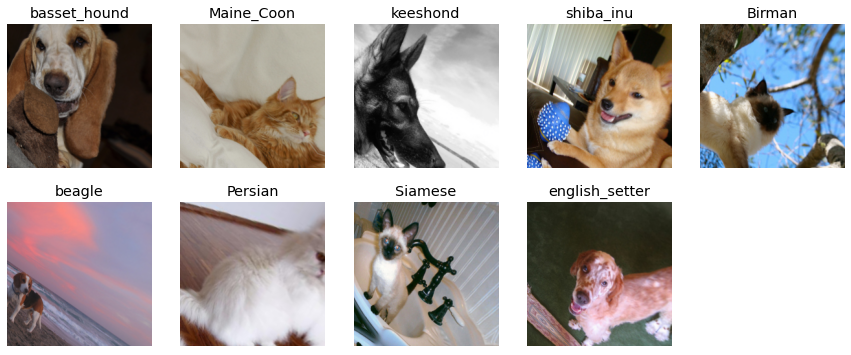

In [13]:

dls.train.show_batch(nrows=2, ncols=5)

In [7]:

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.726126,0.387327,0.125169,01:27


epoch,train_loss,valid_loss,error_rate,time
0,0.599282,0.332751,0.101489,01:53
1,0.370597,0.260346,0.084574,01:54


In [18]:
sample = (path/'images').ls()[1,10,11]
sample, learn.predict(sample[1])

((#3) [Path('images/newfoundland_183.jpg'),Path('images/Siamese_42.jpg'),Path('images/basset_hound_80.jpg')],
 ('Siamese',
  TensorBase(10),
  TensorBase([1.2694e-05, 6.7955e-08, 2.2327e-03, 7.6997e-07, 2.0691e-07, 2.5423e-08, 6.0432e-09, 4.5965e-09, 7.0464e-05, 1.2051e-06, 9.9767e-01, 1.1155e-06, 8.8676e-07, 1.4105e-08, 2.4968e-07, 8.1905e-09,
          2.6299e-07, 9.7585e-07, 5.5237e-07, 1.3782e-09, 9.7350e-08, 2.0258e-07, 6.1956e-09, 2.7037e-08, 1.1131e-07, 2.9866e-07, 6.2391e-07, 3.1394e-07, 9.6867e-08, 6.7269e-07, 1.2481e-07, 6.0244e-08,
          3.6961e-08, 2.5013e-06, 4.1449e-07, 1.1784e-06, 4.0523e-07])))